In [100]:
library(tidyverse)
library(ggtextures)
library(DMwR)
library(magick)
library(ggridges)
library(ggsci)
library(cowplot)
library(see)
ggplot2::theme_set(theme_ridges())

In [101]:
fifa <- read.csv("C:/fifa21_male2.csv", stringsAsFactors = TRUE)

In [102]:
head(fifa)
dim(fifa)
str(fifa)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player.Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
2,16,Luis Garc?a,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
3,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
4,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
5,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
6,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,...,47+0,47+0,50+0,46+0,41+0,41+0,41+0,46+0,13+0,Male


[1] 17125   107

'data.frame':	17125 obs. of  107 variables:
 $ ID              : int  2 16 27 36 41 61 80 241 244 246 ...
 $ Name            : Factor w/ 16173 levels "?. Radu","?der",..: 5718 9770 6940 3930 6605 3656 4175 13098 5698 12623 ...
 $ Age             : int  33 37 33 36 36 27 38 39 35 37 ...
 $ OVA             : int  69 71 71 68 81 66 77 78 76 80 ...
 $ Nationality     : Factor w/ 167 levels "Afghanistan",..: 78 145 49 154 145 59 156 165 49 49 ...
 $ Club            : Factor w/ 918 levels "","?aykur Rizespor",..: 837 478 240 796 884 57 367 535 535 535 ...
 $ BOV             : int  71 70 71 70 82 66 77 78 78 82 ...
 $ BP              : Factor w/ 15 levels "CAM","CB","CDM",..: 10 5 1 15 1 13 5 1 2 1 ...
 $ Position        : Factor w/ 623 levels "","ACB","CAM",..: 273 161 51 1 160 542 174 289 400 174 ...
 $ Player.Photo    : Factor w/ 17125 levels "https://cdn.sofifa.com/players/000/002/16_120.png",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Club.Logo       : Factor w/ 919 levels "","https://cdn.sofifa.com

### 결측값 제거

In [103]:
sum(is.na(fifa))

[1] 843

In [104]:
fifa <- centralImputation(fifa)

In [105]:
sum(is.na(fifa))

[1] 0

### Player Counts of Country

In [106]:
top10_country <- fifa %>% select(Nationality) %>% group_by(Nationality) %>%
  count() %>% arrange(desc(n)) %>% head(10)
top10_country

Nationality,n
<fct>,<int>
England,1707
Germany,1154
Spain,1121
France,990
Brazil,857
Argentina,778
Italy,565
Netherlands,475
Portugal,365


In [107]:
nation <- tibble(
  count = top10_country$n,
  country = top10_country$Nationality,
  image = list(
    image_read("https://upload.wikimedia.org/wikipedia/en/thumb/d/d5/FA_crest_2009.svg/1200px-FA_crest_2009.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Deutscher_Fu%C3%9Fball-Bund_logo.svg/1200px-Deutscher_Fu%C3%9Fball-Bund_logo.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Royal_Spanish_Football_Federation_logo.svg/1200px-Royal_Spanish_Football_Federation_logo.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/en/thumb/2/23/French_Football_Federation_logo.svg/1200px-French_Football_Federation_logo.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/en/thumb/9/99/Brazilian_Football_Confederation_logo.svg/1200px-Brazilian_Football_Confederation_logo.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/en/thumb/1/1e/Asociaci%C3%B3n_del_F%C3%BAtbol_Argentino_%28crest%29.svg/1200px-Asociaci%C3%B3n_del_F%C3%BAtbol_Argentino_%28crest%29.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Federazione_Italiana_Giuoco_Calcio%2C_Logo_2017%2C_4_stars.svg/1200px-Federazione_Italiana_Giuoco_Calcio%2C_Logo_2017%2C_4_stars.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/en/thumb/7/78/Netherlands_national_football_team_logo.svg/1200px-Netherlands_national_football_team_logo.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/en/thumb/5/5f/Portuguese_Football_Federation.svg/1200px-Portuguese_Football_Federation.svg.png"),
    image_read("https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/United_States_Soccer_Federation_logo_2016.svg/1200px-United_States_Soccer_Federation_logo_2016.svg.png")
  )
)

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Pastel1 is 9
Returning the palette you asked for with that many colors
"


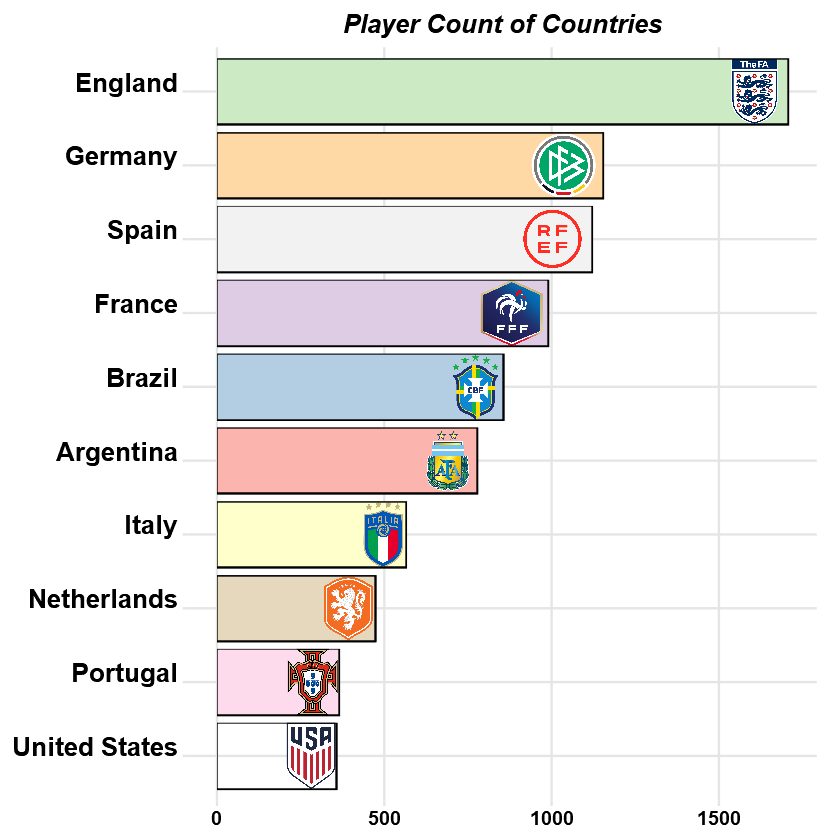

In [108]:
ggplot(nation, aes(fct_reorder(country, count), count, image = image, fill = country)) +
  geom_isotype_col(colour = "black",
    img_height = grid::unit(1, "null"), img_width = NULL,
    ncol = 1, nrow = 1, hjust = 0.98, vjust = 0.1
  ) + coord_flip() +
  ggtitle("Player Count of Countries") + ylab("Count") +
  theme(legend.position = "none",
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 15, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic")) +
  scale_fill_brewer(palette = "Pastel1")

### Height Distribution of Countries

In [109]:
head(fifa$Height)
head(fifa$Weight)

[1] 6'0"  5'10" 5'9"  5'11" 5'7"  5'8" 
21 Levels: 5'1" 5'10" 5'11" 5'2" 5'3" 5'4" 5'5" 5'6" 5'7" 5'8" 5'9" ... 6'9"

[1] 181lbs 143lbs 161lbs 165lbs 150lbs 163lbs
57 Levels: 110lbs 115lbs 117lbs 119lbs 121lbs 123lbs 126lbs 128lbs ... 243lbs

In [110]:
fifa <- fifa %>%
    mutate(Height = as.character(Height)) %>% 
    separate(Height, into = c("feet", "inches"), sep = "'") %>%
    mutate(feet = (as.numeric(feet) * 30.48)) %>%
    mutate(inches = (str_remove(inches, "\"") %>% as.numeric() * 2.54)) %>%
    mutate(Height = feet + inches) %>% 
    mutate(Weight = (str_remove(Weight, "lbs") %>% as.numeric() * 0.453592))

head(fifa) %>% select(Height, Weight)

,Height,Weight
,<dbl>,<dbl>
1,182.88,82.10015
2,177.80,64.86366
3,175.26,73.02831
4,180.34,74.84268
5,170.18,68.03880
6,172.72,73.93550


Warning message:
"Removed 1 rows containing missing values (geom_point)."


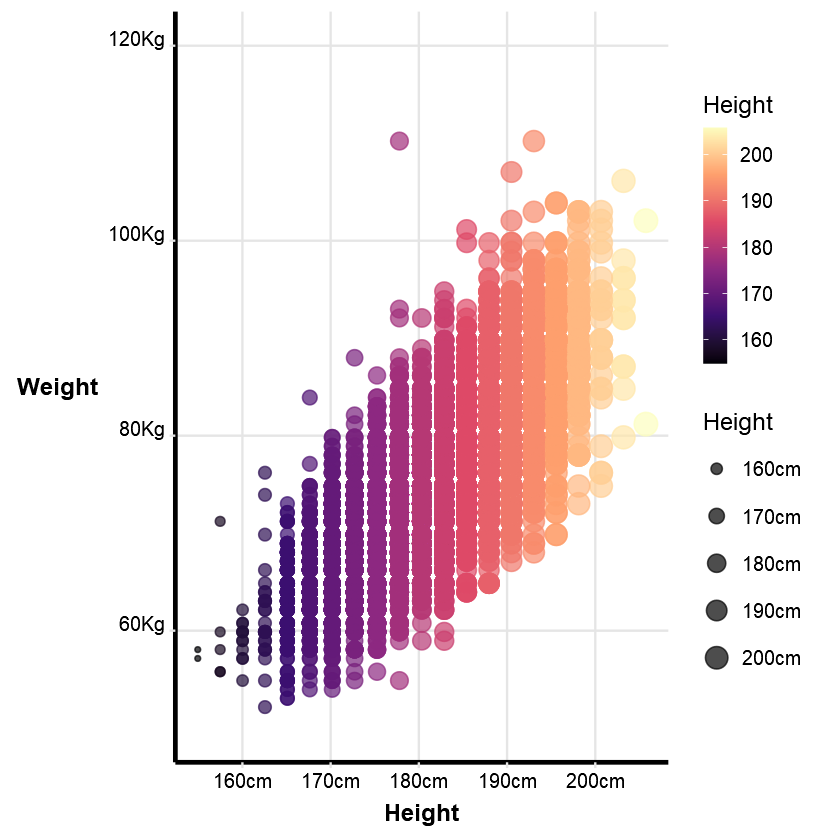

In [117]:
ggplot(fifa, aes(Height, Weight, size = Height, color = Height)) + 
  geom_point(alpha = 0.7) + 
  scale_size_continuous("Height", breaks = seq(150, 220, 10),
                        labels = paste0(seq(150, 220, 10), "cm")) + 
  scale_color_viridis_c("Height", option = "A") +
  scale_y_continuous(labels = paste0(seq(40, 120, 20), "Kg"), 
                     limits = c(50, 120), 
                     breaks = seq(40, 120, 20)) +
  scale_x_continuous(labels = paste0(seq(150, 220, 10), "cm"),
                     breaks = seq(150, 220, 10)) +
  theme(legend.key.height = unit(1, "cm"),
        axis.title.x = element_text(size = 14, face = "bold", hjust = 0.5),
        axis.title.y = element_text(size = 14, face = "bold", angle = 0, vjust = 0.5),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1))

### OVA Distribution of Countries

Picking joint bandwidth of 1.51

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


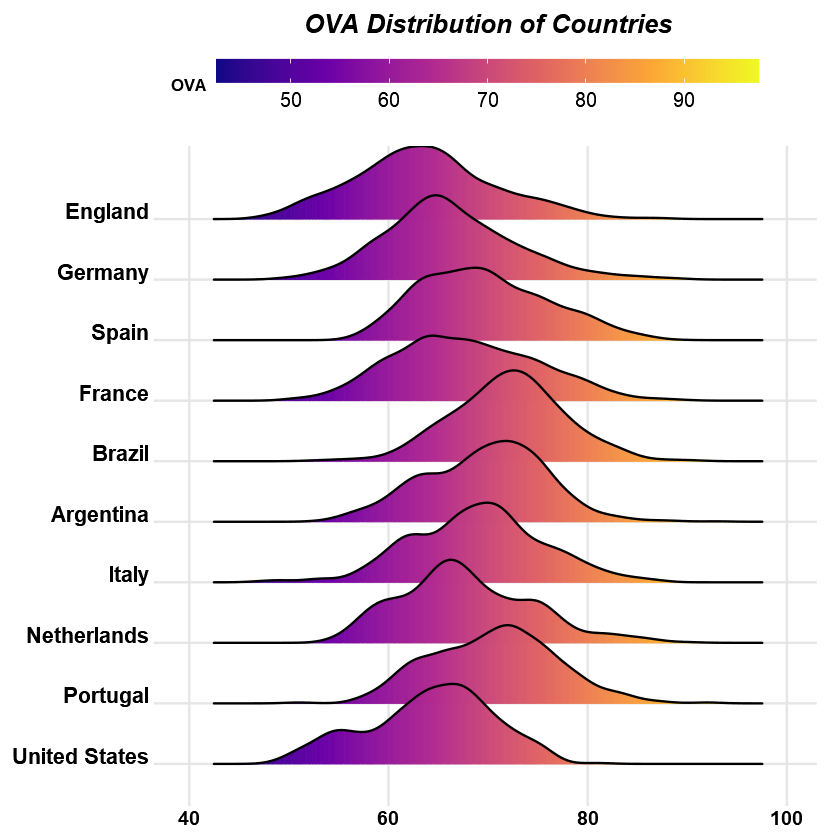

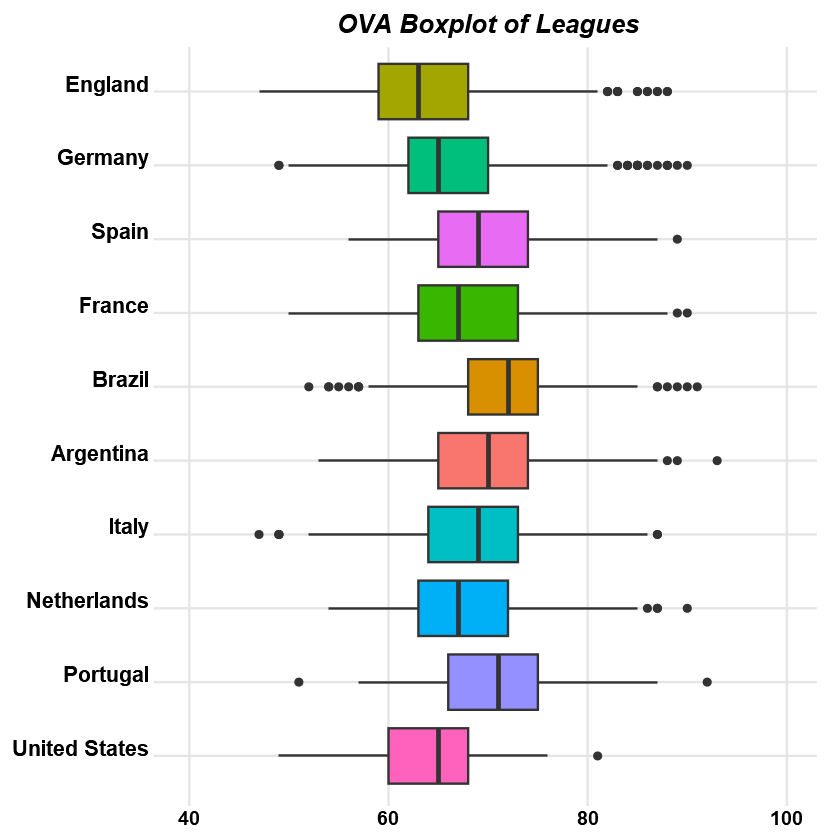

In [118]:
n1 <- fifa %>% filter(Nationality %in% top10_country$Nationality) %>% 
  select(Nationality, OVA) %>%
  ggplot(aes(OVA, fct_relevel(Nationality, rev(as.character(top10_country$Nationality))))) + 
  geom_density_ridges_gradient(aes(fill = stat(x), scale = 1.5)) +
  ggtitle("OVA Distribution of Countries") +
  scale_x_continuous(limits = c(40, 100)) +
  theme(legend.position = "top",
        legend.title = element_text(size = 10, face = "bold"),
        legend.key.width = unit(2.3, "cm"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic")) +
  scale_fill_viridis_c(name = "OVA", option = "C")

n2 <- fifa %>% filter(Nationality %in% top10_country$Nationality) %>% 
  select(Nationality, OVA) %>%
  ggplot(aes(OVA, fct_relevel(Nationality, rev(as.character(top10_country$Nationality))))) +
  geom_boxplot(aes(fill = Nationality)) +
  ggtitle("OVA Boxplot of Leagues") +
  scale_x_continuous(limits = c(40, 100)) +
  theme(legend.position = "none",
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic"))
n1 ; n2

### Left & Right

In [119]:
lar <- fifa %>% group_by(foot) %>% count() %>% 
        mutate(ratio = n / nrow(fifa))
lar$ymax <- cumsum(lar$ratio)
lar$ymin <- c(0, lar$ymax[1])
lar$ymax <- cumsum(lar$ratio)
lar$labelPosition <- c(lar$ratio[1] / 2, lar$ratio[2])
lar$label <- paste0(lar$foot, "\n", round(lar$ratio, 3) * 100, "%")

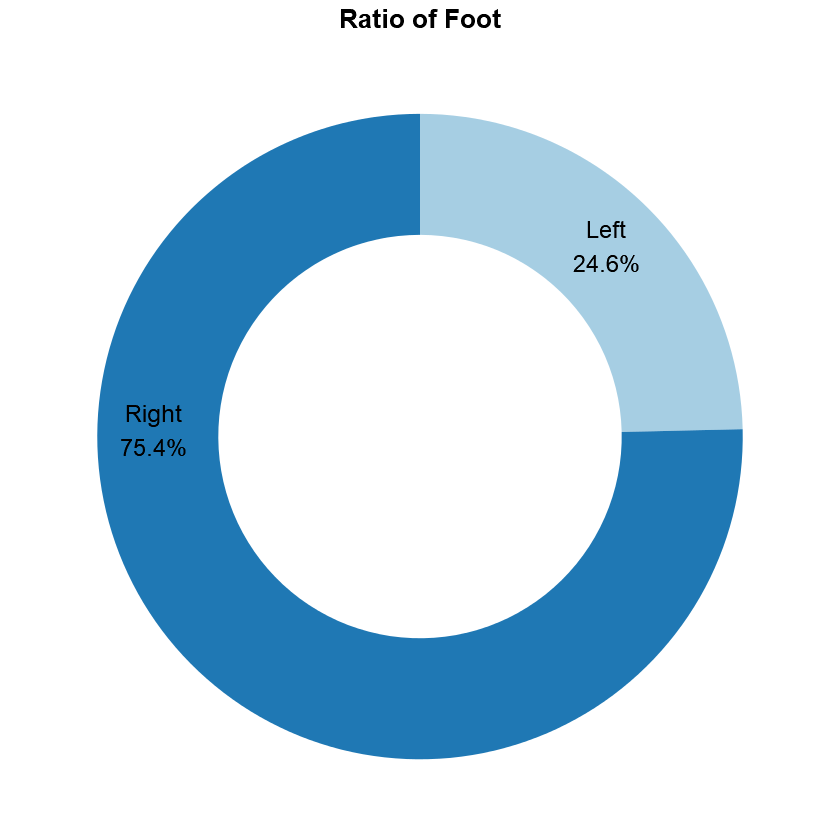

In [120]:
ggplot(lar, aes(ymax = ymax, ymin = ymin, xmax = 5, xmin = 3.5, fill = foot)) + 
    geom_rect() + coord_polar(theta = "y") + xlim(c(1, 5)) + 
    ggtitle("Ratio of Foot") + 
    theme_void() + 
    theme(legend.position = "none",
    plot.title = element_text(size = 15, hjust = 0.5, face = "bold")) + 
    scale_fill_brewer(palette = "Paired") +
    geom_text(x = 4.3, aes(y = labelPosition, label = label), 
              size = 5) 

#### Positions Counts

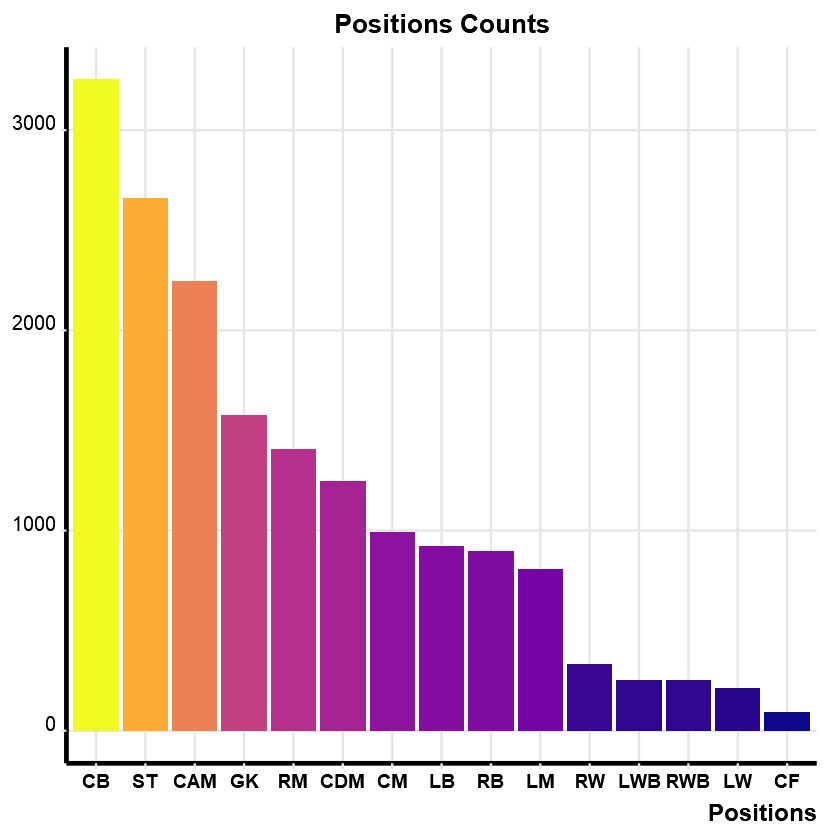

In [121]:
fifa %>% group_by(BP) %>% count()  %>% 
  ggplot(aes(fct_reorder(BP, -n), n, fill = n)) + geom_col() +
  ggtitle("Positions Counts") + xlab("Positions") + 
  theme(legend.position = "none",
        axis.title.y = element_blank(),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(size = 11, face = "bold"),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1)) +
  scale_fill_viridis_c(option = "C")

#### Age Distribution

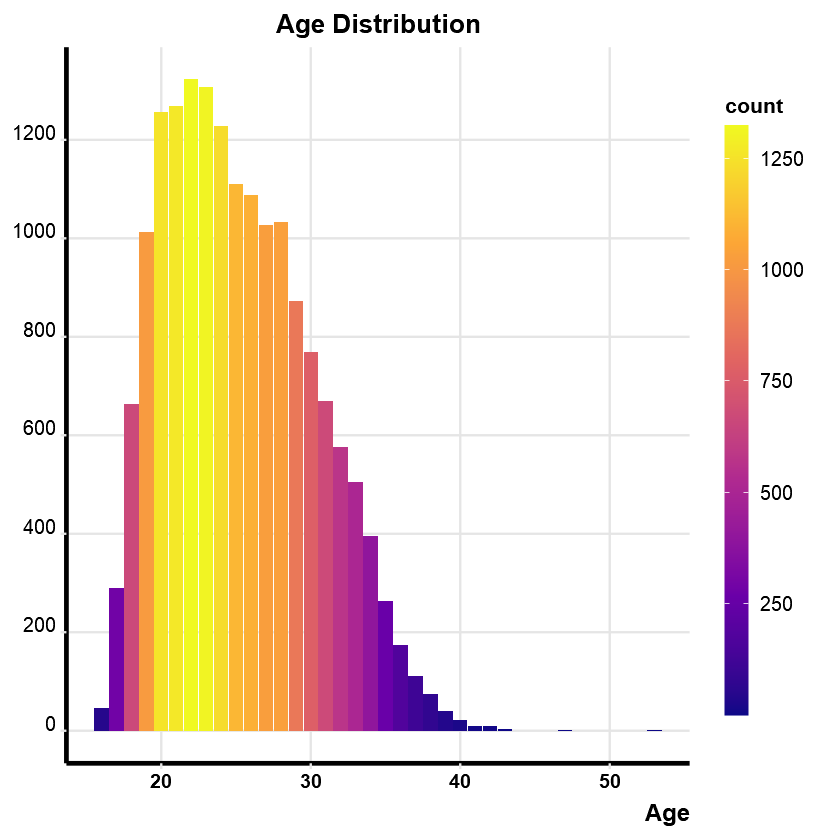

In [122]:
fifa %>% ggplot(aes(Age)) + stat_count(aes(fill = ..count..)) +
  scale_y_continuous(breaks = seq(0, 2000, 200)) + 
  ggtitle("Age Distribution") +
  scale_fill_viridis_c(option = "C") +
  theme(legend.title = element_text(size = 12, face = "bold"),
        legend.key.height = unit(2.5, "cm"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_blank(),
        axis.text.x = element_text(size = 11, face = "bold"),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1))

#### Value & Age

In [123]:
head(fifa$Value)

[1] €625K €600K €1.1M €0    €5.5M €725K
216 Levels: €0 €1.1M €1.2M €1.3M €1.4M €1.5M €1.6M €1.7M ... €9M

In [124]:
fifa$Value <- fifa$Value %>% as.character()
fifa$Value_1 <- str_replace_all(fifa$Value, "€", "") %>%
  str_replace_all("K", "")
for (i in 1:length(fifa$Value_1)) {
  if (str_detect(fifa$Value_1[i], "\\.")) {
    fifa$Value_1[i] <- fifa$Value_1[i] %>% str_remove_all("\\.") %>% 
      str_replace_all("M", "00")
  } else {
    fifa$Value_1[i] <- fifa$Value_1[i] %>% str_remove_all("\\.") %>%
      str_replace_all("M", "000")
  }
}

fifa$Value_1 <- as.integer(fifa$Value_1)
head(fifa$Value_1)

[1]  625  600 1100    0 5500  725

In [125]:
head(fifa$Wage)

[1] €7K  €7K  €15K €0   €12K €5K 
142 Levels: €0 €100K €105K €10K €110K €115K €11K €120K €125K ... €9K

In [126]:
fifa$Wage <- fifa$Wage %>% as.character()
fifa$Wage_1 <- str_replace_all(fifa$Wage, "€", "") %>%
  str_replace_all("K", "000") %>% as.integer()
head(fifa$Wage_1)

[1]  7000  7000 15000     0 12000  5000

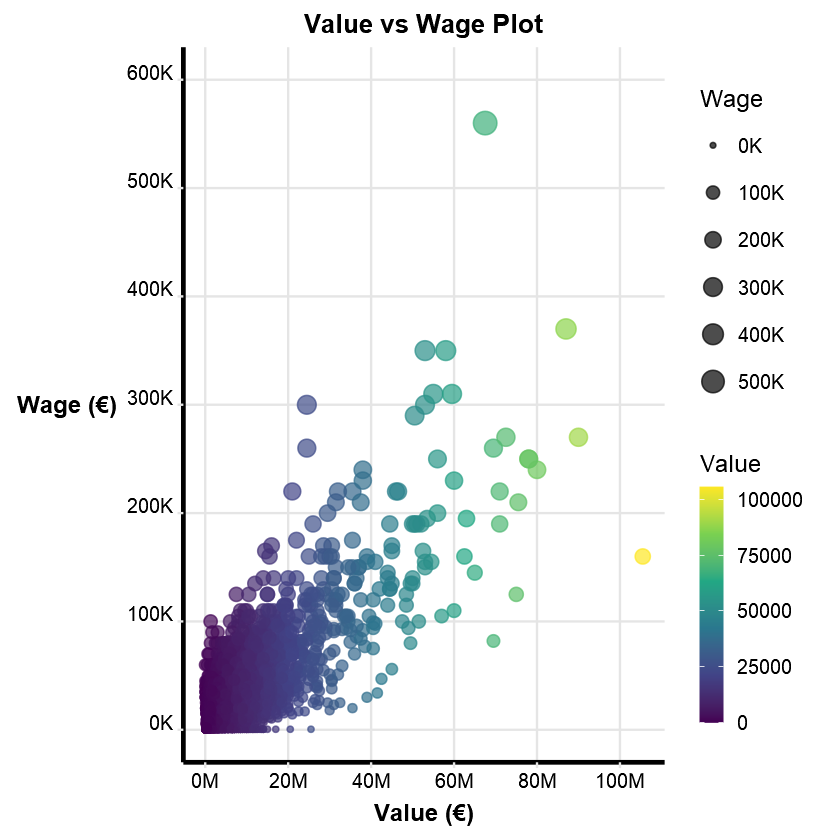

In [127]:
ggplot(fifa, aes(Value_1, Wage_1, size = Wage_1, color = Value_1)) + 
  geom_point(alpha = 0.7) + 
  ggtitle("Value vs Wage Plot") + xlab("Value (€)") + ylab("Wage (€)") + 
  scale_size_continuous("Wage", breaks = seq(0, 600000, 100000),
                        labels = paste0(seq(0, 600, 100), "K")) + 
  scale_color_viridis_c("Value", option = "D") +
  scale_y_continuous(labels = paste0(seq(0, 600, 100), "K"), 
                     limits = c(0, 600000), 
                     breaks = seq(0, 600000, 100000)) +
  scale_x_continuous(labels = paste0(seq(0, 100, 20), "M"),
                     breaks = seq(0, 100000, 20000)) +
  theme(legend.key.height = unit(1, "cm"),
        axis.title.x = element_text(size = 14, face = "bold", hjust = 0.5),
        axis.title.y = element_text(size = 14, face = "bold", angle = 0, vjust = 0.5),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1))

### Top10 Value Players

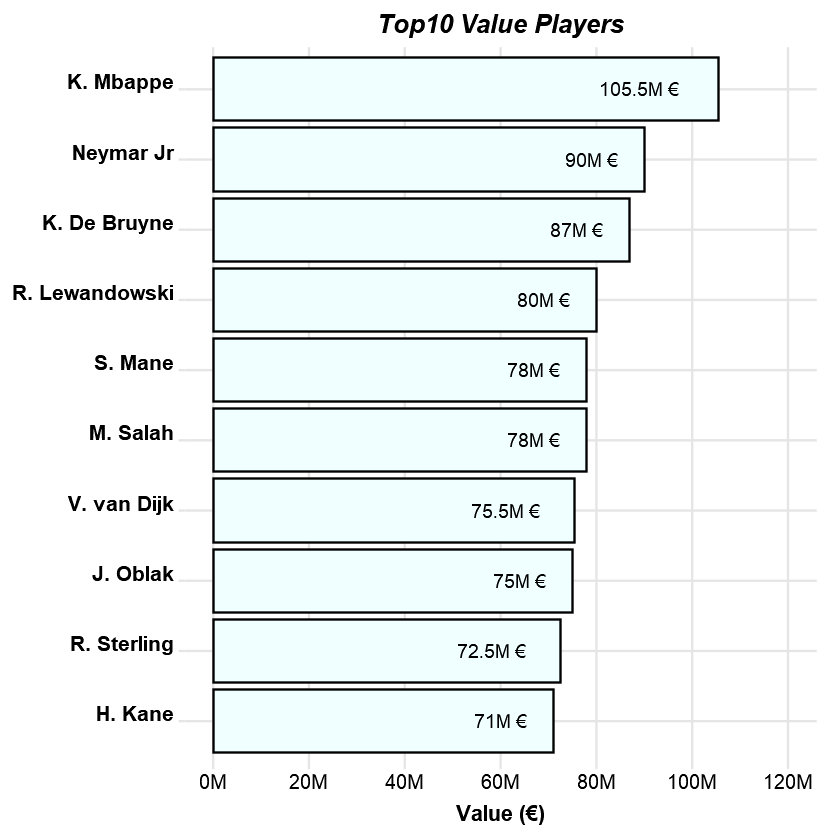

In [128]:
top10_value <- fifa %>% arrange(-Value_1) %>% head(10) %>% 
    mutate(Name = as.character(Name))
top10_value$Name[1] <- "K. Mbappe" ; top10_value$Name[5] <- "S. Mane"

top10_value %>% arrange(-Value_1) %>% head(10) %>%
    ggplot(aes(fct_reorder(Name, Value_1), Value_1)) +
    geom_col(fill = "azure", color = "black") + ylab("Value (€)") + coord_flip() + 
    geom_text(aes(label = paste0(c(Value_1 / 1000), "M €")), hjust = 1.5) + 
    ggtitle("Top10 Value Players") +
    scale_y_continuous(labels = paste0(seq(0, 600, 20), "M"), 
                     limits = c(0, 120000), 
                     breaks = seq(0, 600000, 20000)) +
    theme(legend.position = "none",
          axis.text.y = element_text(size = 12, face = "bold"),
          axis.title.y = element_blank(),
         axis.title.x = element_text(size = 13, face = "bold", hjust = 0.5),
         plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic"))

### Top10 Wage Players

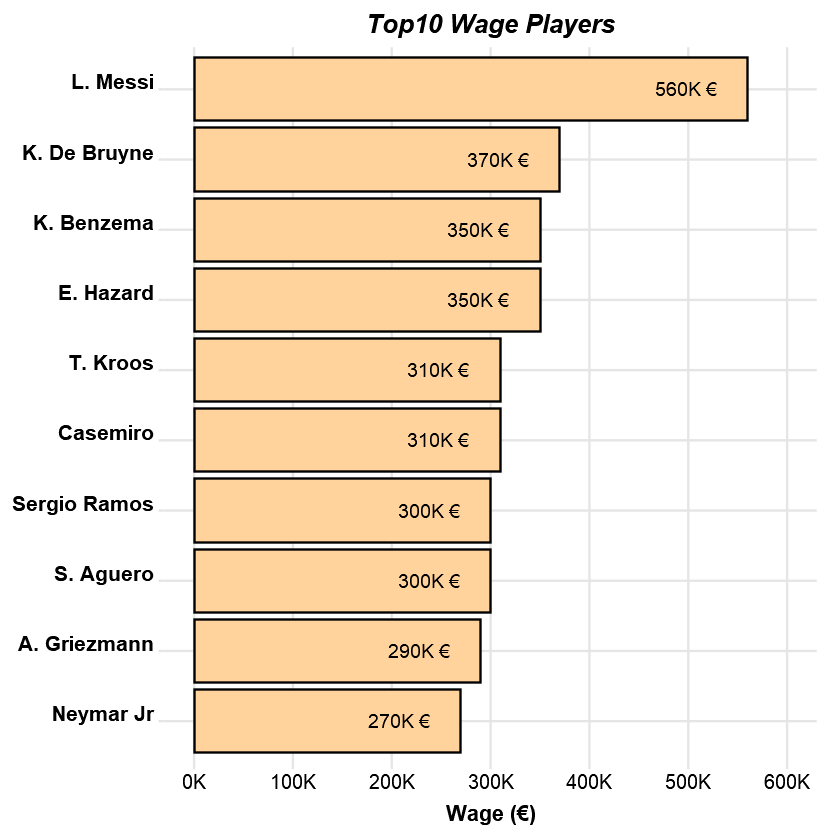

In [129]:
top10_wage <- fifa %>% arrange(-Wage_1) %>% head(10) %>% 
    mutate(Name = as.character(Name))
top10_wage$Name[7] <- "S. Aguero"

top10_wage %>% arrange(-Wage_1) %>% head(10) %>%
    ggplot(aes(fct_reorder(Name, Wage_1), Wage_1)) +
    geom_col(fill = "burlywood1", color = "black") + ylab("Wage (€)") + coord_flip() + 
    geom_text(aes(label = paste0(c(Wage_1 / 1000), "K €")), hjust = 1.5) + 
    ggtitle("Top10 Wage Players") +
    scale_y_continuous(labels = paste0(seq(0, 600, 100), "K"), 
                     limits = c(0, 600000), 
                     breaks = seq(0, 600000, 100000)) +

    theme(legend.position = "none",
          axis.text.y = element_text(size = 12, face = "bold"),
          axis.title.y = element_blank(),
         axis.title.x = element_text(size = 13, face = "bold", hjust = 0.5),
         plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic"))

#### Leagues

In [130]:
EPL <- c("Manchester United", "Manchester City", "Chelsea", "Liverpool", 
         "Leicester City", "Tottenham Hotspur", "West Ham United", "Arsenal",
         "Leeds United", "Everton", "Aston Villa", "Newcastle United", 
         "Wolverhampton Wanderers", "Crystal Palace", "Southampton", "Brighton & Hove Albion",
         "Burnley", "Fulham", "West Bromwich Albion", "Sheffield United")

LALIGA <- c("Real Madrid", "Atletico Madrid", "FC Barcelona", "Athletic Club de Bilbao", "Real Betis", 
            "RC Celta", "Real Sociedad", "Valencia CF", "Real Valladolid CF", "Deportivo Alav?s",
            "SD Eibar", "Elche CF", "CA Osasuna", "Sevilla FC", "Villarreal CF",
            "Levante UD", "Getafe CF", "C?diz CF", "Granada CF", "SD Huesca")

BUNDES <- c("FC Bayern M?nchen", "Borussia Dortmund", "Borussia M?nchengladbach", "SC Freiburg", 
            "1. FC K?ln", "Bayer 04 Leverkusen", "FC Schalke 04", "VfB Stuttgart", 
            "SV Werder Bremen", "DSC Arminia Bielefeld", "Hertha BSC", "1. FSV Mainz 05", 
            "VfL Wolfsburg", "Eintracht Frankfurt", "1. FC Union Berlin",
            "TSG 1899 Hoffenheim", "FC Augsburg", "RB Leipzig")
SERIE <- c("Juventus", "Inter", "Atalanta", "Lazio",
           "Milan", "Napoli", "Parma", "Roma",
           "Torino", "Udinese", "Bologna", "Hellas Verona",
           "Sampdoria", "Cagliari", "Fiorentina", "Genoa",
           "Crotone", "Spezia", "Sassuolo", "Benevento")
LIGUE1 <- c("Paris Saint-Germain", "Olympique Lyonnais", "Olympique de Marseille", "OGC Nice",
            "FC Nantes", "FC Girondins de Bordeaux", "Racing Club de Lens", "LOSC Lille",
            "FC Metz", "AS Monaco", "Montpellier HSC", "Stade Rennais FC",
            "RC Strasbourg Alsace", "FC Lorient", "N?mes Olympique", "Stade Brestois 29",
            "Stade de Reims", "Angers SCO", "AS Saint-?tienne", "Dijon FCO")

In [131]:
league_df <- fifa %>% filter(Club %in% c(EPL, LALIGA, BUNDES, SERIE, LIGUE1))

for (i in 1:nrow(league_df)) {
  if (league_df$Club[i] %in% EPL) {
    league_df$League[i] = "EPL"
  } else if (league_df$Club[i] %in% LALIGA) {
    league_df$League[i] = "LALIGA"
  } else if (league_df$Club[i] %in% BUNDES) {
    league_df$League[i] = "BUNDES"
  } else if (league_df$Club[i] %in% SERIE) {
    league_df$League[i] = "SERIE"
  } else {
    league_df$League[i] = "LIGUE1"
  }
}

dim(league_df)

[1] 3524  112

Picking joint bandwidth of 1.78



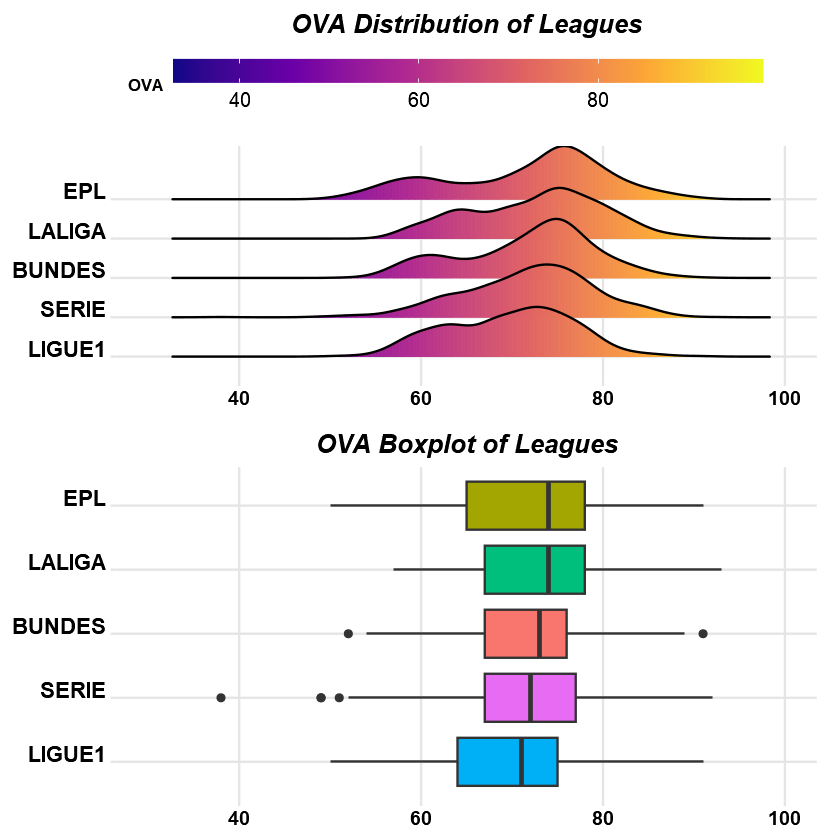

In [132]:
a1 <- league_df %>% group_by(League) %>% select(League, OVA) %>%
  ggplot(aes(OVA, fct_relevel(League, c("LIGUE1", "SERIE", "BUNDES", "LALIGA", "EPL")))) + 
  geom_density_ridges_gradient(aes(fill = stat(x), scale = 1.5)) +
  ggtitle("OVA Distribution of Leagues") +
  scale_x_continuous(limits = c(30, 100)) + 
  theme(legend.position = "top",
        legend.title = element_text(size = 10, face = "bold"),
        legend.key.width = unit(2.5, "cm"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic")) +
  scale_fill_viridis_c(name = "OVA", option = "C")

a2 <- league_df %>% group_by(League) %>% select(League, OVA) %>%
  ggplot(aes(OVA, fct_relevel(League, c("LIGUE1", "SERIE", "BUNDES", "LALIGA", "EPL")))) + 
  geom_boxplot(aes(fill = League)) +
  ggtitle("OVA Boxplot of Leagues") +
  scale_x_continuous(limits = c(30, 100)) +
  theme(legend.position = "none",
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic"))

gridExtra::grid.arrange(a1, a2, nrow = 2)

Picking joint bandwidth of 5490



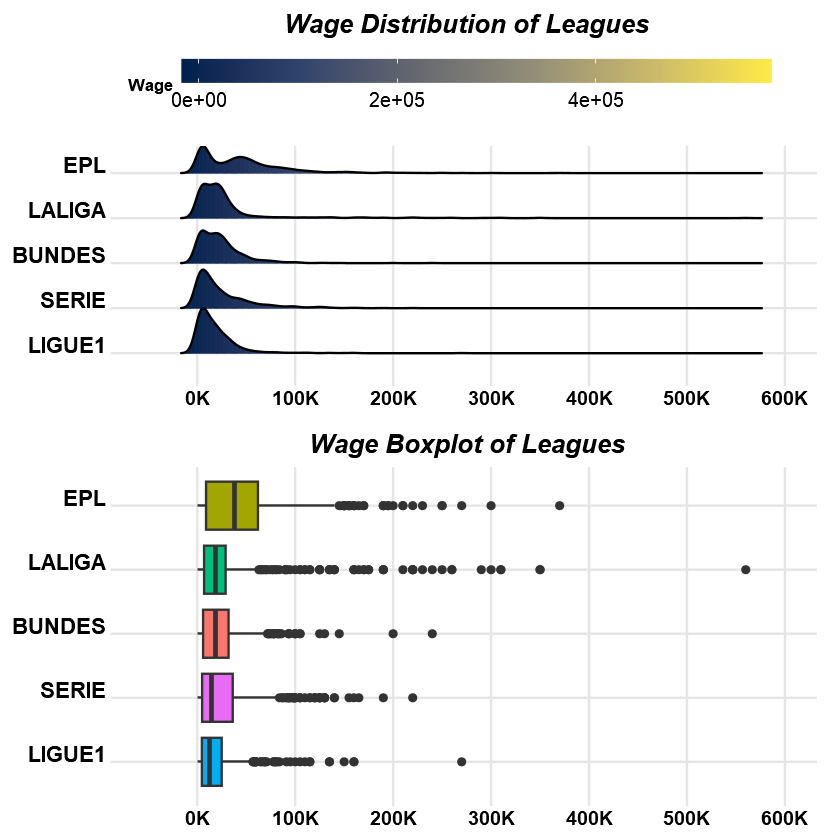

In [133]:
b1 <- league_df %>% group_by(League) %>% select(League, Wage_1) %>%
  ggplot(aes(Wage_1, fct_relevel(League, c("LIGUE1", "SERIE", "BUNDES", "LALIGA", "EPL")))) + 
  geom_density_ridges_gradient(aes(fill = stat(x), scale = 1)) +
  ggtitle("Wage Distribution of Leagues") +
  scale_x_continuous(labels = paste0(seq(0, 600, 100), "K"), 
                     limits = c(-50000, 600000), 
                     breaks = seq(0, 600000, 100000)) +
  theme(legend.position = "top",
        legend.title = element_text(size = 10, face = "bold"),
        legend.key.width = unit(2.5, "cm"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic")) +
  scale_fill_viridis_c(name = "Wage", option = "E")

b2 <- league_df %>% group_by(League) %>% select(League, Wage_1) %>%
  ggplot(aes(Wage_1, fct_relevel(League, c("LIGUE1", "SERIE", "BUNDES", "LALIGA", "EPL")))) + 
  geom_boxplot(aes(fill = League)) +
  scale_x_continuous(labels = paste0(seq(0, 600, 100), "K"), 
                     limits = c(-50000, 600000), 
                     breaks = seq(0, 600000, 100000)) +
  ggtitle("Wage Boxplot of Leagues") +
  theme(legend.position = "none",
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic"))

gridExtra::grid.arrange(b1, b2, nrow = 2)

Picking joint bandwidth of 1370



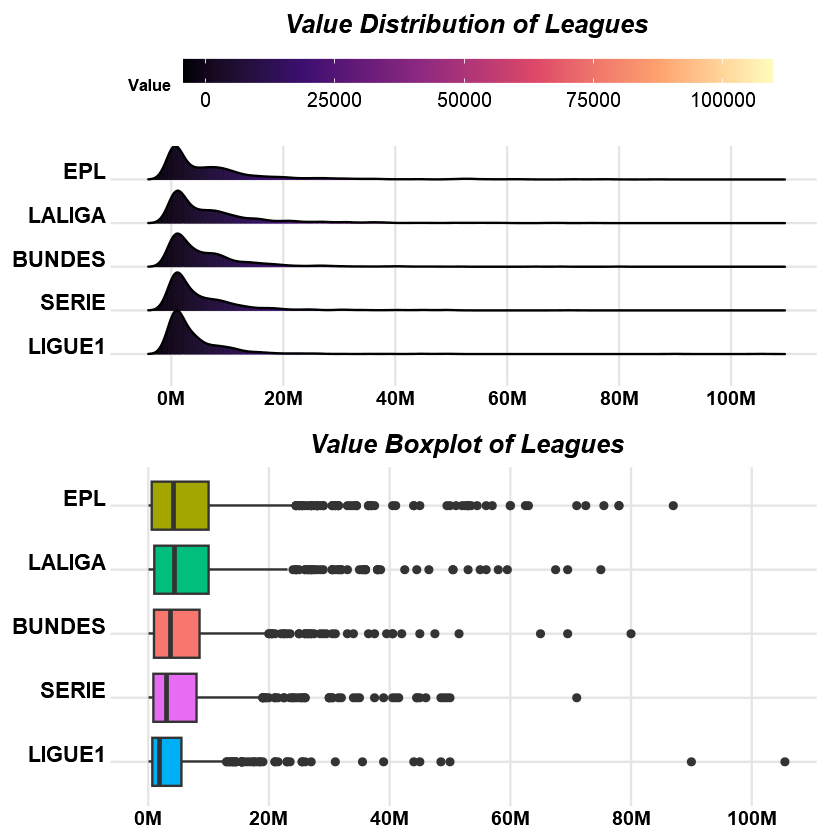

In [134]:
c1 <- league_df %>% group_by(League) %>% select(League, Value_1) %>%
  ggplot(aes(Value_1, fct_relevel(League, c("LIGUE1", "SERIE", "BUNDES", "LALIGA", "EPL")))) + 
  geom_density_ridges_gradient(aes(fill = stat(x), scale = 1)) +
  ggtitle("Value Distribution of Leagues") +
  scale_x_continuous(labels = paste0(seq(0, 100, 20), "M"),
                     breaks = seq(0, 100000, 20000)) +
  theme(legend.position = "top",
        legend.title = element_text(size = 10, face = "bold"),
        legend.key.width = unit(2.5, "cm"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic")) +
  scale_fill_viridis_c(name = "Value", option = "A")

c2 <- league_df %>% group_by(League) %>% select(League, Value_1) %>%
  ggplot(aes(Value_1, fct_relevel(League, c("LIGUE1", "SERIE", "BUNDES", "LALIGA", "EPL")))) + 
  geom_boxplot(aes(fill = League)) +
  scale_x_continuous(labels = paste0(seq(0, 100, 20), "M"),
                     breaks = seq(0, 100000, 20000)) +
  ggtitle("Value Boxplot of Leagues") +
  theme(legend.position = "none",
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 13, face = "bold"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold.italic"))

gridExtra::grid.arrange(c1, c2, nrow = 2)

### EPL

In [135]:
FW_LW_RW <- c("ST", "CF", "LW", "LM", "RM", "RW")
MF <- c("CM", "CAM", "CDM")
LB <- c("LB", "LWB") ; RB <- c("RB", "RWB")
CB <- c("CB") ; GK = c("GK")

for (i in 1:nrow(league_df)) {
  if (league_df$BP[i] %in% FW_LW_RW) {
    league_df$BP2[i] = "FW_LW_RW"
  } else if (league_df$BP[i] %in% MF) {
    league_df$BP2[i] = "MF"
  } else if (league_df$BP[i] %in% LB) {
    league_df$BP2[i] = "LB"
  } else if (league_df$BP[i] %in% RB) {
    league_df$BP2[i] = "RB"
  } else if (league_df$BP[i] %in% CB) {
    league_df$BP2[i] = "CB"
  } else if (league_df$BP[i] %in% GK) {
    league_df$BP2[i] = "GK"
  }
}

In [136]:
epl_fw <- league_df %>% filter(League == "EPL") %>% filter(BP2 == "FW_LW_RW") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
epl_mf <- league_df %>% filter(League == "EPL") %>% filter(BP2 == "MF") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
epl_lb <- league_df %>% filter(League == "EPL") %>% filter(BP2 == "LB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
epl_cb <- league_df %>% filter(League == "EPL") %>% filter(BP2 == "CB") %>% 
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
epl_rb <- league_df %>% filter(League == "EPL") %>% filter(BP2 == "RB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
epl_gk <- league_df %>% filter(League == "EPL") %>% filter(BP2 == "GK") %>% 
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)

In [137]:
rbind(epl_fw, epl_mf) %>% rbind(epl_lb) %>% rbind(epl_cb) %>% rbind(epl_rb) %>% rbind(epl_gk)

Name,Nationality,Club,OVA,BP,Age
<fct>,<fct>,<fct>,<int>,<fct>,<int>
S. Man?,Senegal,Liverpool,90,LW,28
M. Salah,Egypt,Liverpool,90,RW,28
S. Ag?ero,Argentina,Manchester City,89,ST,32
K. De Bruyne,Belgium,Manchester City,91,CAM,29
N. Kant?,France,Chelsea,88,CDM,29
Fabinho,Brazil,Liverpool,87,CDM,26
A. Robertson,Scotland,Liverpool,87,LB,26
V. van Dijk,Netherlands,Liverpool,90,CB,28
A. Laporte,France,Manchester City,87,CB,26


### LALIGA

In [138]:
llg_fw <- league_df %>% filter(League == "LALIGA") %>% filter(BP2 == "FW_LW_RW") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
llg_mf <- league_df %>% filter(League == "LALIGA") %>% filter(BP2 == "MF") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
llg_lb <- league_df %>% filter(League == "LALIGA") %>% filter(BP2 == "LB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
llg_cb <- league_df %>% filter(League == "LALIGA") %>% filter(BP2 == "CB") %>% 
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
llg_rb <- league_df %>% filter(League == "LALIGA") %>% filter(BP2 == "RB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
llg_gk <- league_df %>% filter(League == "LALIGA") %>% filter(BP2 == "GK") %>% 
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)

In [139]:
rbind(llg_fw, llg_mf) %>% rbind(llg_lb) %>% rbind(llg_cb) %>% rbind(llg_rb) %>% rbind(llg_gk)

Name,Nationality,Club,OVA,BP,Age
<fct>,<fct>,<fct>,<int>,<fct>,<int>
L. Messi,Argentina,FC Barcelona,93,RW,33
K. Benzema,France,Real Madrid,89,CF,32
E. Hazard,Belgium,Real Madrid,88,LW,29
Casemiro,Brazil,Real Madrid,89,CDM,28
T. Kroos,Germany,Real Madrid,88,CM,30
L. Modri?,Croatia,Real Madrid,87,CM,34
Jordi Alba,Spain,FC Barcelona,86,LB,31
Sergio Ramos,Spain,Real Madrid,89,CB,34
Piqu?,Spain,FC Barcelona,86,CB,33


### BUNDES

In [140]:
bun_fw <- league_df %>% filter(League == "BUNDES") %>% filter(BP2 == "FW_LW_RW") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
bun_mf <- league_df %>% filter(League == "BUNDES") %>% filter(BP2 == "MF") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
bun_lb <- league_df %>% filter(League == "BUNDES") %>% filter(BP2 == "LB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
bun_cb <- league_df %>% filter(League == "BUNDES") %>% filter(BP2 == "CB") %>% 
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
bun_rb <- league_df %>% filter(League == "BUNDES") %>% filter(BP2 == "RB") %>%
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
bun_gk <- league_df %>% filter(League == "BUNDES") %>% filter(BP2 == "GK") %>% 
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)

In [141]:
rbind(bun_fw, bun_mf) %>% rbind(bun_lb) %>% rbind(bun_cb) %>% rbind(bun_rb[2,]) %>% rbind(bun_gk)

,Name,Nationality,Club,OVA,BP,Age
,<fct>,<fct>,<fct>,<int>,<fct>,<int>
1,R. Lewandowski,Poland,FC Bayern M?nchen,91,ST,31
2,S. Gnabry,Germany,FC Bayern M?nchen,85,RM,24
3,L. San?,Germany,FC Bayern M?nchen,85,LM,24
4,J. Kimmich,Germany,FC Bayern M?nchen,88,CDM,25
5,J. Sancho,England,Borussia Dortmund,87,CAM,20
6,T. M?ller,Germany,FC Bayern M?nchen,86,CAM,30
7,M. Halstenberg,Germany,RB Leipzig,82,LB,28
8,M. Hummels,Germany,Borussia Dortmund,86,CB,31
9,D. Alaba,Austria,FC Bayern M?nchen,84,CB,28


### Serie

In [142]:
ser_fw <- league_df %>% filter(League == "SERIE") %>% filter(BP2 == "FW_LW_RW") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
ser_mf <- league_df %>% filter(League == "SERIE") %>% filter(BP2 == "MF") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
ser_lb <- league_df %>% filter(League == "SERIE") %>% filter(BP2 == "LB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
ser_cb <- league_df %>% filter(League == "SERIE") %>% filter(BP2 == "CB") %>% 
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
ser_rb <- league_df %>% filter(League == "SERIE") %>% filter(BP2 == "RB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
ser_gk <- league_df %>% filter(League == "SERIE") %>% filter(BP2 == "GK") %>% 
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)

In [143]:
rbind(ser_fw, ser_mf) %>% rbind(ser_lb) %>% rbind(ser_cb) %>% rbind(ser_rb) %>% rbind(ser_gk)

Name,Nationality,Club,OVA,BP,Age
<fct>,<fct>,<fct>,<int>,<fct>,<int>
Cristiano Ronaldo,Portugal,Juventus,92,ST,35
C. Immobile,Italy,Lazio,87,ST,30
D. Mertens,Belgium,Napoli,85,CF,33
P. Dybala,Argentina,Juventus,88,CAM,26
A. G?mez,Argentina,Atalanta,86,CAM,32
C. Eriksen,Denmark,Inter,85,CAM,28
Alex Sandro,Brazil,Juventus,85,LB,29
K. Koulibaly,Senegal,Napoli,88,CB,29
G. Chiellini,Italy,Juventus,87,CB,35


### LIGUE1

In [144]:
lig_fw <- league_df %>% filter(League == "LIGUE1") %>% filter(BP2 == "FW_LW_RW") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
lig_mf <- league_df %>% filter(League == "LIGUE1") %>% filter(BP2 == "MF") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
lig_lb <- league_df %>% filter(League == "LIGUE1") %>% filter(BP2 == "LB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
lig_cb <- league_df %>% filter(League == "LIGUE1") %>% filter(BP2 == "CB") %>% 
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
lig_rb <- league_df %>% filter(League == "LIGUE1") %>% filter(BP2 == "RB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
lig_gk <- league_df %>% filter(League == "LIGUE1") %>% filter(BP2 == "GK") %>% 
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)

In [145]:
rbind(lig_fw, lig_mf) %>% rbind(lig_lb) %>% rbind(lig_cb) %>% rbind(lig_rb) %>% rbind(lig_gk)

Name,Nationality,Club,OVA,BP,Age
<fct>,<fct>,<fct>,<int>,<fct>,<int>
Neymar Jr,Brazil,Paris Saint-Germain,91,LW,28
K. Mbapp?,France,Paris Saint-Germain,90,ST,21
A. Di Mar?a,Argentina,Paris Saint-Germain,87,RW,32
M. Verratti,Italy,Paris Saint-Germain,86,CM,27
M. Depay,Netherlands,Olympique Lyonnais,85,CAM,26
I. Gueye,Senegal,Paris Saint-Germain,84,CDM,30
Juan Bernat,Spain,Paris Saint-Germain,83,LB,27
Marquinhos,Brazil,Paris Saint-Germain,85,CB,26
P. Kimpembe,France,Paris Saint-Germain,81,CB,24


### TOTAL

In [146]:
tot_fw <- league_df %>% filter(BP2 == "FW_LW_RW") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
tot_mf <- league_df %>% filter(BP2 == "MF") %>% 
        arrange(-OVA) %>% head(3) %>% select(Name, Nationality, Club, OVA, BP, Age)
tot_lb <- league_df %>% filter(BP2 == "LB") %>%
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)
tot_cb <- league_df %>% filter(BP2 == "CB") %>% 
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
tot_rb <- league_df %>% filter(BP2 == "RB") %>%
        arrange(-OVA) %>% head(2) %>% select(Name, Nationality, Club, OVA, BP, Age)
tot_gk <- league_df %>% filter(BP2 == "GK") %>% 
        arrange(-OVA) %>% head(1) %>% select(Name, Nationality, Club, OVA, BP, Age)

In [147]:
rbind(tot_fw, tot_mf) %>% rbind(tot_lb) %>% rbind(tot_cb) %>% rbind(tot_rb[2,]) %>% rbind(tot_gk)

,Name,Nationality,Club,OVA,BP,Age
,<fct>,<fct>,<fct>,<int>,<fct>,<int>
1,L. Messi,Argentina,FC Barcelona,93,RW,33
2,Cristiano Ronaldo,Portugal,Juventus,92,ST,35
3,R. Lewandowski,Poland,FC Bayern M?nchen,91,ST,31
4,K. De Bruyne,Belgium,Manchester City,91,CAM,29
5,Casemiro,Brazil,Real Madrid,89,CDM,28
6,T. Kroos,Germany,Real Madrid,88,CM,30
7,A. Robertson,Scotland,Liverpool,87,LB,26
8,V. van Dijk,Netherlands,Liverpool,90,CB,28
9,Sergio Ramos,Spain,Real Madrid,89,CB,34


### Rookies

In [148]:
(best_rk <- league_df %>% filter(Age <= 23) %>% 
        arrange(-POT) %>% head(10) %>% select(Name, Nationality, Club, POT, BP, Age))

,Name,Nationality,Club,POT,BP,Age
,<fct>,<fct>,<fct>,<int>,<fct>,<int>
1,K. Mbapp?,France,Paris Saint-Germain,95,ST,21
2,J. Sancho,England,Borussia Dortmund,93,CAM,20
3,K. Havertz,Germany,Chelsea,93,CAM,21
4,Vin?cius Jr.,Brazil,Real Madrid,93,RM,19
5,Jo?o F?lix,Portugal,Atletico Madrid,93,CAM,20
6,G. Donnarumma,Italy,Milan,92,GK,21
7,T. Alexander-Arnold,England,Liverpool,92,RB,21
8,M. de Ligt,Netherlands,Juventus,92,CB,20
9,E. Haaland,Norway,Borussia Dortmund,92,ST,19


In [150]:
write.csv(league_df, "league_df.csv", row.names = FALSE)